## 1) Reading an image



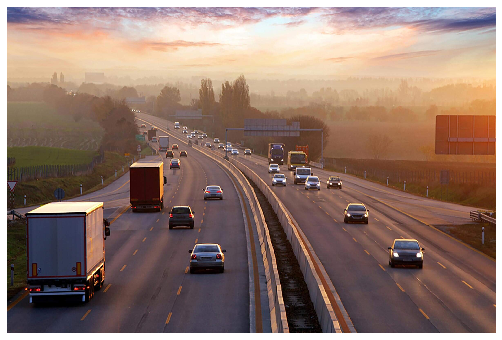

<Figure size 432x288 with 0 Axes>

In [84]:
import cv2 
import matplotlib.pyplot as plt


def display(img):
    plt.figure(figsize=(10,6))
    plt.axis("off")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    plt.clf()
    
# Reading the image using imread() function 
image = cv2.imread("images/image.jpg")
display(image)

In [85]:
# Extracting the height, width and channel of an image 
h, w, c = image.shape
print('width:  ', w)
print('height: ', h)
print('channel:', c)

width:   2400
height:  1603
channel: 3


In [86]:
# Extracting RGB values, by randomly choosing a pixel 
# by passing in 100, 100 for height and width. 
(B, G, R) = image[100, 100] 
print('Red:  ', R)
print('Green: ', G)
print('Blue:', B)

Red:   211
Green:  172
Blue: 165


In [87]:
# We can also pass the channel to extract  
# the value for a specific channel 
B = image[100, 100, 0] 
print('Blue:', B)

Blue: 165



------

## 2) Extracting the Region of Interest (ROI)

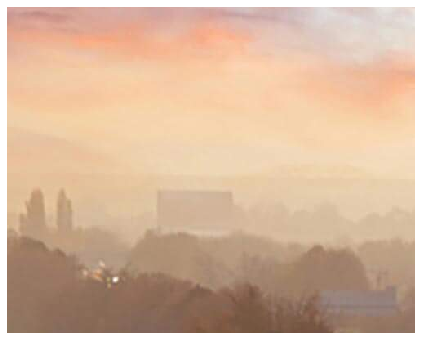

<Figure size 432x288 with 0 Axes>

In [88]:
# We will calculate the region of interest  
# by slicing the pixels of the image 
roi = image[100 : 500, 200 : 700]
display(roi)


------

## 3) Resizing the Image



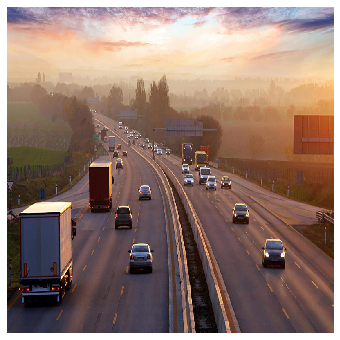

<Figure size 432x288 with 0 Axes>

In [89]:
# resize() function takes 2 parameters,  
# the image and the dimensions 
resize = cv2.resize(image, (800, 800)) 
display(resize)

> The problem with this approach is that the aspect ratio of the image is not maintained. So we need to do some extra work in order to maintain a proper aspect ratio.


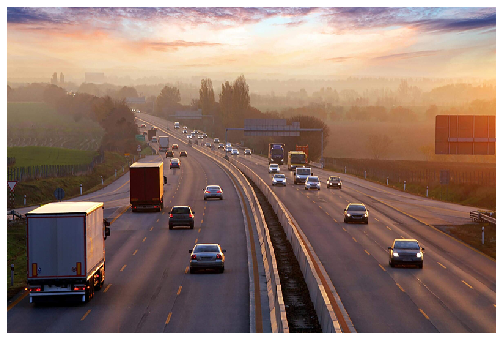

<Figure size 432x288 with 0 Axes>

In [90]:
# Calculating the ratio by dividing the new width by the old one
ratio = 800 / w 
  
# Creating a tuple containing the new dimention (width and height)
# Then, resizing the image 
resize_aspect = cv2.resize(image, (800, int(h * ratio)) )
display(resize_aspect)


------

## 4) Rotating the Image



#### 1- Generating a rotation matrix 


###### cv2.getRotationMatrix2D(center, angle, scale) → retval
- **Parameters**:
    - **center** – Center of the rotation in the source image.
    - **angle** – Rotation angle in degrees. Positive values mean counter-clockwise rotation (the coordinate origin is assumed to be the top-left corner).
    - **scale** – Isotropic scale factor.
    - **map_matrix** – The output affine transformation, 2x3 floating-point matrix.
    

It returns a 2*3 matrix consisting of values derived from alpha and beta
alpha = scale * cos(angle)
beta = scale * sine(angle)
<img src="https://media.geeksforgeeks.org/wp-content/uploads/20190904230758/Screenshot-2019-08-24-at-5.38.11-PM.png" width="400">


In [16]:
# Calculating the center of the image 
center = (w // 2, h // 2) 
matrix = cv2.getRotationMatrix2D(center, -45, 1.0)  

#### 2- Performing the affine transformation

##### cv2.warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]) → dst

- **Parameters**:	
    - **src** – input image.
    - **dst** – output image that has the size dsize and the same type as src .
    - **M** – 2\times 3 transformation matrix.
    - **dsize** – size of the output image.
    - **flags** – combination of interpolation methods (see resize() ) and the optional flag WARP_INVERSE_MAP that means that M is the inverse transformation ( \texttt{dst}\rightarrow\texttt{src} ).
    - **borderMode** – pixel extrapolation method (see borderInterpolate()); when borderMode=BORDER_TRANSPARENT , it means that the pixels in the destination image corresponding to the “outliers” in the source image are not modified by the function.
    - **borderValue** – value used in case of a constant border; by default, it is 0.

##### The function warpAffine transforms the source image using the specified matrix:

<img src="https://docs.opencv.org/2.4/_images/math/189dfa6dbab9ff81eaeaa453b1a1e2313dcd3a26.png" width="400">

Here M is the rotation matrix, described above.
It calculates new x, y co-ordinates of the image and transforms it.

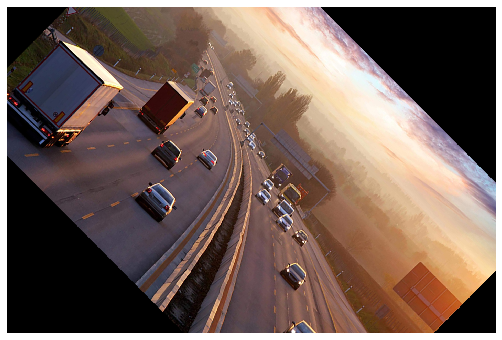

<Figure size 432x288 with 0 Axes>

In [91]:
rotated = cv2.warpAffine(image, matrix, (w, h)) 
display(rotated)


------

## 5) Drawing a Rectangle


#### cv2.rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) → None

- **Parameters**:	
     - **img** – Image.
     - **pt1** – Vertex of the rectangle. (Top-left corner co-ordinates)
     - **pt2** – Vertex of the rectangle opposite to pt1. (Bottom-right corner co-ordinates)
     - **rec** – Alternative specification of the drawn rectangle.
     - **color** – Rectangle color or brightness (grayscale image). (Color (in BGR format))
     - **thickness** – Thickness of lines that make up the rectangle. Negative values, like CV_FILLED , mean that the  function has to draw a filled rectangle.
     - **lineType** – Type of the line. See the line() description.
     - **shift** – Number of fractional bits in the point coordinates.

###### The function rectangle draws a rectangle outline or a filled rectangle whose two opposite corners are pt1 and pt2, or r.tl() and r.br()-Point(1,1).
> it is an in-place operation

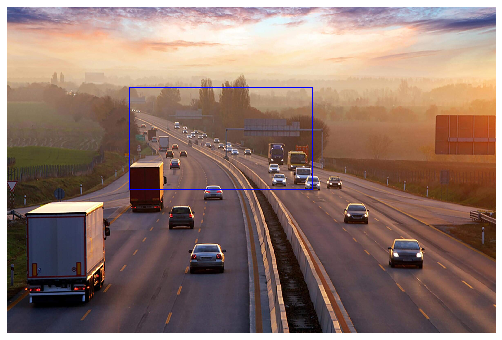

<Figure size 432x288 with 0 Axes>

In [92]:
# We are copying the original image, as it is an in-place operation. 
output = image.copy() 
  
# Using the rectangle() function to create a rectangle. 
rectangle = cv2.rectangle(output, (1500, 900),  
                          (600, 400), (255, 0, 0), 2) 

display(rectangle)


------

## 5) Displaying text

#### cv.PutText(img, text, org, font, color) → None


- Parameters:	
    - **img** – Image.
    - **text** – Text string to be drawn.
    - **org** – Bottom-left corner of the text string in the image from where the text should start.
    - **font** – CvFont structure initialized using InitFont().
    - **fontFace** – Font type. One of FONT_HERSHEY_SIMPLEX, FONT_HERSHEY_PLAIN, FONT_HERSHEY_DUPLEX, FONT_HERSHEY_COMPLEX, FONT_HERSHEY_TRIPLEX, FONT_HERSHEY_COMPLEX_SMALL, FONT_HERSHEY_SCRIPT_SIMPLEX, or FONT_HERSHEY_SCRIPT_COMPLEX, where each of the font ID’s can be combined with FONT_ITALIC to get the slanted letters.
    - **fontScale** – Font scale factor that is multiplied by the font-specific base size.
    - **color** – Text color.
    - **thickness** – Thickness of the lines used to draw a text.
    - **lineType** – Line type. See the line for details.
    - **bottomLeftOrigin** – When true, the image data origin is at the bottom-left corner. Otherwise, it is at the top-left corner.

**The function putText renders the specified text string in the image. Symbols that cannot be rendered using the specified font are replaced by question marks.**

> it's also an in-place operation

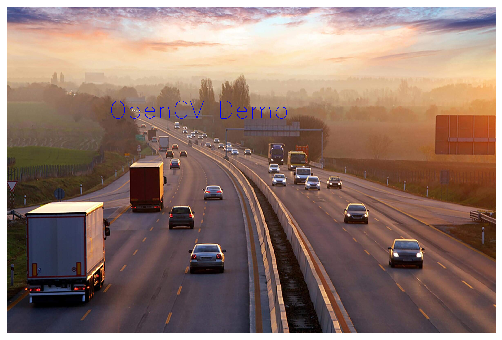

<Figure size 432x288 with 0 Axes>

In [96]:
# We are copying the original image, as it is an in-place operation. 
output = image.copy() 
  
# Adding the text using putText() function 
text = cv2.putText(output, 'OpenCV Demo', (500, 550),  
                   cv2.FONT_HERSHEY_SIMPLEX, 4, (255, 0, 0), 2) 
display(text)


------

## 6) Reading and displaying an image in OpenCV

Inorder to do this, some external libraries are required to install :

`pip install opencv-python`
`pip install numpy`
`pip install matplotlib`


###              Example #1 (Using Numpy) :

In [32]:
# Python code to reading an image using OpenCV 
import numpy as np 
import cv2 
  
# You can give path to the 
# image as first argument 
img = cv2.imread('images/cc-2.png', 0) 
  
# will show the image in a window 
cv2.imshow('image', img)
# De-allocate any associated memory usage  
# wait for ESC key to exit 
# wait for 's' key to save and exit 

if cv2.waitKey(0) & 0xff == 27:  
    cv2.destroyAllWindows()  

### Example #2 (Using Matplotlib):



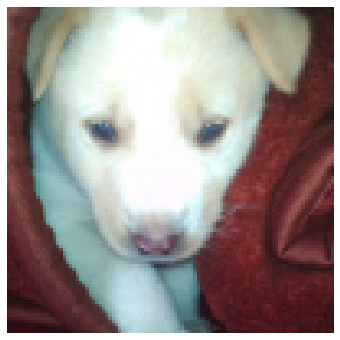

<Figure size 432x288 with 0 Axes>

In [97]:
# Python code to reading an image using OpenCV 
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
  
img = cv2.imread('images/cc-2.png') 

display(img)


---


------

## 7) Arithmetic Operations on Images using OpenCV | Set-1 (Addition and Subtraction)


```
Arithmetic Operations like Addition, Subtraction, and Bitwise Operations(AND, OR, NOT, XOR) can be applied to the input images. These operations can be helpful in enhancing the properties of the input images. The Image arithmetics are important for analyzing the input image properties. The operated images can be further used as an enhanced input image, and many more operations can be applied for clarifying, thresholding, dilating etc of the image.
```


### 1- Addition of two images
```
We can add two images by using function cv2.add(). This directly adds up image pixels in the two images.
But adding the pixels is not an ideal situation. So, we use `cv2.addweighted()`.
Remember, both images should be of equal size and depth.
```

Syntax: `cv.AddWeighted(src1, alpha, src2, beta, gamma, dst) → None`

- **Parameters**:	
    - **src1** – first input array (Single-channel, 8-bit or floating-point).
    - **alpha** – Weight of the first input image elements to be applied to the final image.
    - **src2** – second input array of the same size and channel number as src1 (Single-channel, 8-bit or floating-point).
    - **beta** – Weight of the second input image elements to be applied to the final image
    - **dst** – output array that has the same size and number of channels as the input arrays.
    - **gamma** – scalar added to each sum (Measurement of light).
    - **dtype** – optional depth of the output array; when both input arrays have the same depth, dtype can be set to -1, which will be equivalent to src1.depth().

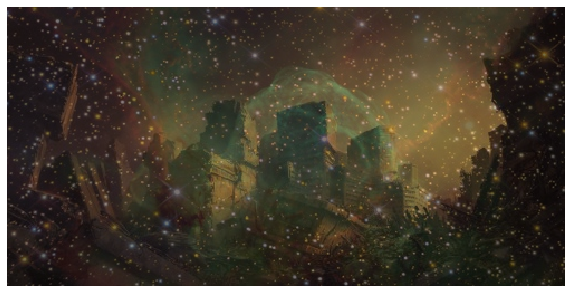

<Figure size 432x288 with 0 Axes>

In [98]:
# Python programe to illustrate arithmetic operation of addition of two images 
    
# organizing imports  
import cv2  
import numpy as np  
    
# path to input images are specified and images are loaded with imread command  
image1 = cv2.imread('images/input1.jpg')  
image2 = cv2.imread('images/input2.jpg') 
  
# cv2.addWeighted() is applied over the image inputs with applied parameters 
weightedSum = cv2.addWeighted(image1, 0.5, image2, 0.4, 0) 

""" 
# the window showing output image with the weighted sum  
cv2.imshow('Weighted Image', weightedSum) 
  
# De-allocate any associated memory usage   
if cv2.waitKey(0) & 0xff == 27:  
    cv2.destroyAllWindows()  
"""

display(weightedSum)


------

### 1- Subtraction of two images

```
Just like addition, we can subtract the pixel values in two images and merge them with the help of cv2.subtract(). The images should be of equal size and depth.
```
Syntax:  `cv.subtract(src1, src2[, dst[, mask[, dtype]]])`

- Parameters
   - **src1** => first input array or a scalar.
   - **src2** => second input array or a scalar.
   - **dst**   => output array of the same size and the same number of channels as the input array.
   - **mask** => optional operation mask; this is an 8-bit single channel array that specifies elements of the output array to be changed.
   - **dtype**=> optional depth of the output array

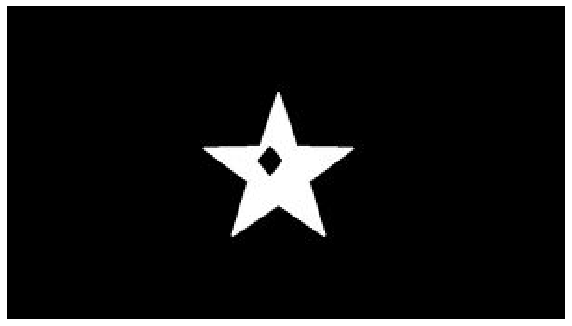

<Figure size 432x288 with 0 Axes>

In [99]:
import cv2  
import numpy as np  
    
# path to input images are specified and images are loaded with imread command  
image1 = cv2.imread('images/star-1.jpg')  
image2 = cv2.imread('images/dot.jpg') 
  
# cv2.subtract is applied over the image inputs with applied parameters 
sub = cv2.subtract(image1, image2) 
  
"""
# the window showing output image with the subtracted image  
cv2.imshow('Subtracted Image', sub) 
  
# De-allocate any associated memory usage   
if cv2.waitKey(0) & 0xff == 27:  
    cv2.destroyAllWindows() 
"""

display(sub)


------

## 8) Arithmetic Operations on Images using OpenCV | Set-2 (Bitwise Operations on Binary Images)

`Bitwise operations are used in image manipulation and used for extracting essential parts in the image.`

Bitwise operations used are :

    1- AND
    2- OR
    3- XOR
    4 -NOT
    
Also, Bitwise operations helps in image masking. Image creation can be enabled with the help of these operations. These operations can be helpful in enhancing the properties of the input images.

> NOTE: The Bitwise operations should be applied on input images of same dimensions

**input 1**

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20190222191001/1bit1.png">

**input 2**
<img src="https://media.geeksforgeeks.org/wp-content/uploads/20190222191045/2bit2.png">



### 1- Bitwise AND operation on Image:

Bit-wise conjunction of input array elements.

Syntax: `cv2.bitwise_and(cv.bitwise_and(src1, src2[, dst[, mask]]))`

- **Parameters**
   - **src1** => first input array or a scalar.
   - **src2** => second input array or a scalar.
   - **dst**  => output array of the same size and the same number of channels as the input array.
   - **mask** => optional operation mask; this is an 8-bit single channel array that specifies elements of the output array to be changed.


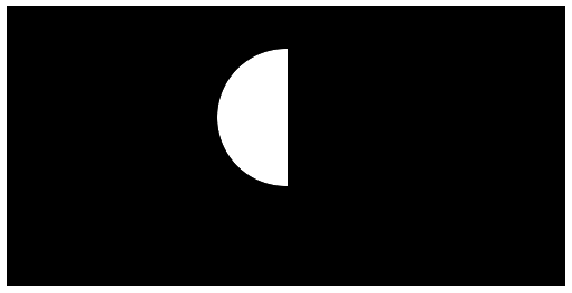

<Figure size 432x288 with 0 Axes>

In [100]:
import cv2  
import numpy as np  
     
image1 = cv2.imread('images/1bit1.png')  
image2 = cv2.imread('images/2bit2.png') 
  
# cv2.bitwise_and is applied over the image inputs with applied parameters  
dest_and = cv2.bitwise_and(image2, image1, mask = None) 
  
"""
# the window showing output image with the Bitwise AND operation on the input images 
cv2.imshow('Bitwise And', dest_and) 
   
# De-allocate any associated memory usage   
if cv2.waitKey(0) & 0xff == 27:  
    cv2.destroyAllWindows() 
"""

display(dest_and)


------

### 2- Bitwise OR operation on Image:

Bit-wise disconjunction of input array elements.

Syntax: `cv2.bitwise_or(cv.bitwise_and(src1, src2[, dst[, mask]]))`

- **Parameters**
   - **src1** => first input array or a scalar.
   - **src2** => second input array or a scalar.
   - **dst**  => output array of the same size and the same number of channels as the input array.
   - **mask** => optional operation mask; this is an 8-bit single channel array that specifies elements of the output array to be changed.

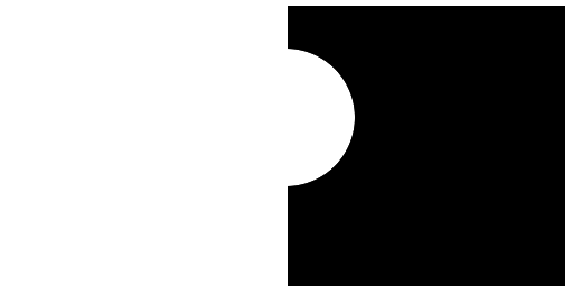

<Figure size 432x288 with 0 Axes>

In [101]:
import cv2  
import numpy as np  
     
image1 = cv2.imread('images/1bit1.png')  
image2 = cv2.imread('images/2bit2.png') 
   
  
# cv2.bitwise_or is applied over the image inputs with applied parameters  
dest_or  = cv2.bitwise_or(image2, image1, mask = None) 

"""
# the window showing output image with the Bitwise AND operation on the input images 
cv2.imshow('Bitwise OR', dest_or) 
   
# De-allocate any associated memory usage   
if cv2.waitKey(0) & 0xff == 27:  
    cv2.destroyAllWindows()
"""
display(dest_or)

### 2- Bitwise XOR operation on Image:

Bit-wise exclusive-OR operation on input array elements.

Syntax: `cv2.bitwise_xor(cv.bitwise_and(src1, src2[, dst[, mask]]))`

- **Parameters**
   - **src1** => first input array or a scalar.
   - **src2** => second input array or a scalar.
   - **dst**  => output array of the same size and the same number of channels as the input array.
   - **mask** => optional operation mask; this is an 8-bit single channel array that specifies elements of the output array to be changed.

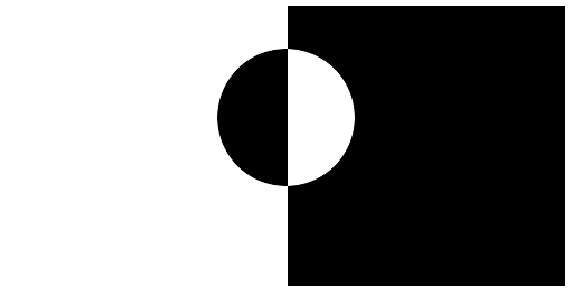

<Figure size 432x288 with 0 Axes>

In [102]:
import cv2  
import numpy as np  
     
image1 = cv2.imread('images/1bit1.png')  
image2 = cv2.imread('images/2bit2.png') 
  
# cv2.bitwise_XOR is applied over the image inputs with applied parameters  
dest_XOR = cv2.bitwise_xor(image2, image1, mask = None) 
 
""" 
# the window showing output image with the Bitwise AND operation on the input images 
cv2.imshow('Bitwise XOR', dest_XOR) 
   
# De-allocate any associated memory usage   
if cv2.waitKey(0) & 0xff == 27:  
    cv2.destroyAllWindows() 
"""    
    
display(dest_XOR)

### 2- Bitwise NOT operation on Image:

Inversion of input array elements.

Syntax: `cv2.bitwise_not(ource, destination, mask)`

- **Parameters**
   - **src** => input Image array(Single-channel, 8-bit or floating-point)
   - **dst**  => output array of the same size and the same number of channels as the input array.
   - **mask** => optional operation mask; this is an 8-bit single channel array that specifies elements of the output array to be changed.

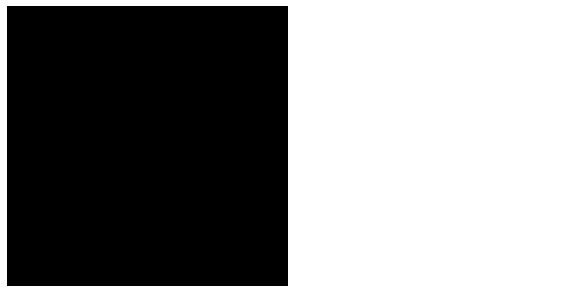

<Figure size 432x288 with 0 Axes>

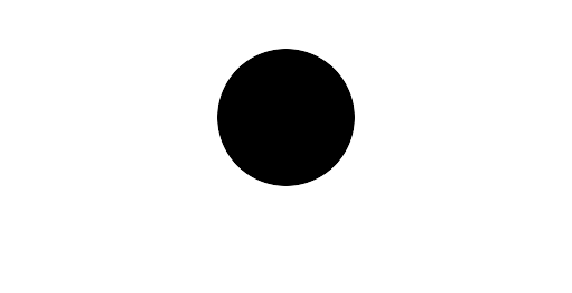

<Figure size 432x288 with 0 Axes>

In [103]:
import cv2  
import numpy as np  

image1 = cv2.imread('images/1bit1.png')  
image2 = cv2.imread('images/2bit2.png') 
  
# cv2.bitwise_not is applied over the image input with applied parameters  
dest_not1 = cv2.bitwise_not(image1, mask = None) 
dest_not2 = cv2.bitwise_not(image2, mask = None) 
 
"""
# the windows showing output image with the Bitwise NOT operation on the 1st and 2nd input image 
cv2.imshow('Bitwise NOT on image 1', dest_not1) 
cv2.imshow('Bitwise NOT on image 2', dest_not2) 
   
# De-allocate any associated memory usage   
if cv2.waitKey(0) & 0xff == 27:  
    cv2.destroyAllWindows()
"""
display(dest_not1)
display(dest_not2)